# K means clustering project practice 1?

* CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)


- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Numbe of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [3]:
path ='/content/drive/MyDrive/MY DS PROJECT PRACTICEOCT 23/CC GENERAL.csv'

In [5]:
df=pd.read_csv(path)

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.shape

(8950, 18)

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [7]:
# Calculate the number of missing values
missing_values = df['MINIMUM_PAYMENTS'].isnull().sum()

# Calculate the total number of rows
total_rows = len(df)

# Calculate the percentage of missing values
percentage_missing = (missing_values / total_rows) * 100

print(f"The percentage of missing values for 'MINIMUM_PAYMENTS' is: {percentage_missing:.2f}%")

The percentage of missing values for 'MINIMUM_PAYMENTS' is: 3.50%


In [8]:
 df.dropna(inplace=True)

In [9]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
'''If only a small percentage of rows have missing values for a particular feature (e.g., less than 5-10%),
it may be reasonable to consider dropping those rows.'''

'If only a small percentage of rows have missing values for a particular feature (e.g., less than 5-10%), \nit may be reasonable to consider dropping those rows.'

In [10]:
df.drop("CUST_ID", axis = 1, inplace = True) # drop cust _id column

In [ ]:
# In k means clustering you should always consider your specific goals and domain knowledge when selecting features

In [11]:
X = df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']]


# Standaridization :
- here features are very differe so i choose clustering

In [13]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
X_scaled1 = scaler.fit_transform(X)


In [16]:
# we can use min max scaling
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler()
X_scaled2 = scaler2.fit_transform(X)


In [19]:
#
scaled_data= pd.DataFrame(X_scaled2, columns=X.columns)

In [20]:
scaled_data.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,0.002148,0.001945,0.000000,0.004240,0.000000,0.031720,0.003978,0.001826
1,0.168169,0.000000,0.000000,0.000000,0.136685,0.232053,0.080892,0.014034
2,0.131026,0.015766,0.018968,0.000000,0.000000,0.248748,0.012263,0.008210
3,0.042940,0.000326,0.000393,0.000000,0.000000,0.038397,0.013373,0.003204
4,0.095038,0.027188,0.000000,0.059257,0.000000,0.058431,0.027602,0.031506


# choose no. of clusters : k?

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# or directly run k means clustering ML model

kmean=KMeans(2)

In [ ]:
k1= kmean.fit(X)#without scaling


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
k2 =kmean.fit(X_scaled)   # with scaled

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clustred=k1.predict(X) # without scalid doing clustering
clustred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
df['clustred']=clustred
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clustred
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0


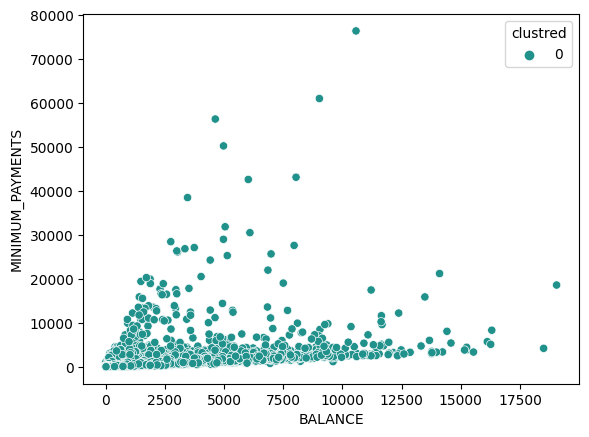

In [ ]:
# plot scatter plot to show clusters?

import seaborn as sns
sns.scatterplot(x=df["BALANCE"], y=df['MINIMUM_PAYMENTS'], palette='viridis',hue=df['clustred'])
plt.show()


<ipython-input-50-83d9cbf8a2d4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df["BALANCE"], y=df['MINIMUM_PAYMENTS'], palette='viridis',c=df['clustred'])


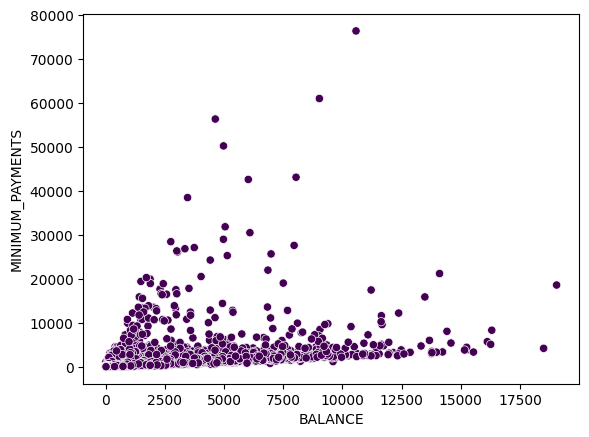

In [ ]:

import seaborn as sns
sns.scatterplot(x=df["BALANCE"], y=df['MINIMUM_PAYMENTS'], palette='viridis',c=df['clustred'])
#if 'clustred' contains numerical values representing some continuous measure, using c=df['clustred']
plt.show()

**Using x vlaue scaled : Min Max scalert**
X_scaled2

In [35]:
#  K MEANS CLUSTERING ON SCALED DATA : OF MIN MAX SCALER
from sklearn.cluster import KMeans
km3=KMeans(5,random_state=40)

k3= km3.fit(X_scaled2)#witH MIN MAX SCALING


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
clustred3=k3.predict(X_scaled2) # with scaling clustering
clustred3

array([1, 2, 2, ..., 1, 1, 1], dtype=int32)

In [37]:
scaled_data['clustred3']=clustred3  # min max scaled clusterd after applying Kmeans algo.
scaled_data.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,clustred3
0,0.002148,0.001945,0.000000,0.004240,0.000000,0.031720,0.003978,0.001826,1
1,0.168169,0.000000,0.000000,0.000000,0.136685,0.232053,0.080892,0.014034,2
2,0.131026,0.015766,0.018968,0.000000,0.000000,0.248748,0.012263,0.008210,2
3,0.042940,0.000326,0.000393,0.000000,0.000000,0.038397,0.013373,0.003204,1
4,0.095038,0.027188,0.000000,0.059257,0.000000,0.058431,0.027602,0.031506,1


In [40]:
corr=scaled_data.corr()
corr

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,clustred3
BALANCE,1.000000,0.176083,0.159985,0.122109,0.495586,0.535518,0.322830,0.398669,-0.158716
PURCHASES,0.176083,1.000000,0.916780,0.679259,-0.053760,0.358425,0.606782,0.093842,0.231574
ONEOFF_PURCHASES,0.159985,0.916780,1.000000,0.329650,-0.033244,0.320613,0.570850,0.048741,0.208417
INSTALLMENTS_PURCHASES,0.122109,0.679259,0.329650,1.000000,-0.066099,0.258057,0.385391,0.132156,0.164537
CASH_ADVANCE,0.495586,-0.053760,-0.033244,-0.066099,1.000000,0.304161,0.459342,0.140094,-0.100972
CREDIT_LIMIT,0.535518,0.358425,0.320613,0.258057,0.304161,1.000000,0.426951,0.126671,0.472449
PAYMENTS,0.322830,0.606782,0.570850,0.385391,0.459342,0.426951,1.000000,0.126630,0.149465
MINIMUM_PAYMENTS,0.398669,0.093842,0.048741,0.132156,0.140094,0.126671,0.126630,1.000000,-0.085608
clustred3,-0.158716,0.231574,0.208417,0.164537,-0.100972,0.472449,0.149465,-0.085608,1.000000


In [28]:
# Instead, use .loc for assignment to avoid the warning #IGNORE THIS CELL
X.loc[:, 'clustred3'] = clustred3

<ipython-input-28-658326defe30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'clustred3'] = clustred3


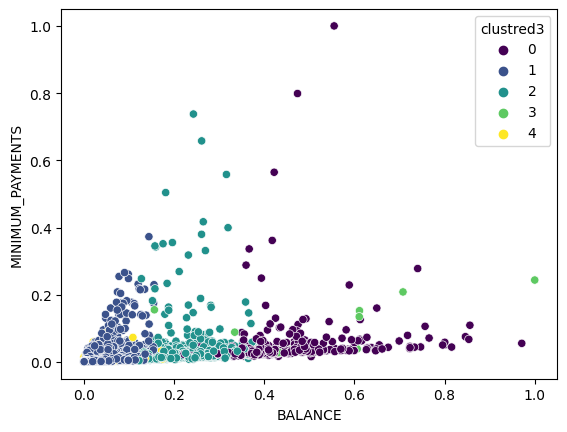

In [38]:
import seaborn as sns
sns.scatterplot(x=scaled_data["BALANCE"], y=scaled_data['MINIMUM_PAYMENTS'], palette='viridis',hue=scaled_data['clustred3'])
plt.show()

In [ ]:
# Choose the Number of Clusters:

# Use an elbow plot to help choose the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()
